[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alikn/intro_to_ai/blob/master/regularized_linear_regression.ipynb)

In [58]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
X, y =load_diabetes(return_X_y=True)

In [61]:
X_df = pd.DataFrame(X)
X_df = X_df.rename(columns={0: 'age', 1: 'sex', 2: 'bmi', 3: 'bp', 4: 'tc', 5: 'ldl', 6: 'hdl', 7: 'tch', 8: 'ltg', 9: 'glu'})
data_source = X_df.copy()
data_source['diabetes'] = y
data_source

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Split the data between train and validation

The assumption in this notebook is that we have already splitted the test set and we are not loading it here. We use the data loaded in this notebook for training (training set) and comparing the models (validation set). In a real world case, we need a separate test set for the final test of the best model before we can use it on production data.

In [62]:
data = data_source.copy()
data_train, data_validation = train_test_split(data, test_size=0.33, random_state=42)

In [66]:
data_train.shape

(296, 11)

In [67]:
data_validation.shape

(146, 11)

### Exploratory data analysis

In [70]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 231 to 102
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    float64
 2   bmi       296 non-null    float64
 3   bp        296 non-null    float64
 4   tc        296 non-null    float64
 5   ldl       296 non-null    float64
 6   hdl       296 non-null    float64
 7   tch       296 non-null    float64
 8   ltg       296 non-null    float64
 9   glu       296 non-null    float64
 10  diabetes  296 non-null    float64
dtypes: float64(11)
memory usage: 27.8 KB


In [69]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,0.001198,0.046214,-0.107226,-0.034575,0.005383,0.038076,0.110727
sex,296.0,0.000121,0.047653,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,296.0,0.001768,0.047630,-0.089197,-0.030996,-0.005128,0.033673,0.160855
bp,296.0,0.001165,0.048152,-0.112399,-0.036656,-0.005670,0.035644,0.132044
tc,296.0,0.000927,0.047765,-0.108893,-0.033560,-0.002945,0.027670,0.153914
ldl,296.0,0.000353,0.047571,-0.115613,-0.030437,-0.003506,0.027966,0.198788
hdl,296.0,0.000375,0.047634,-0.102307,-0.032356,-0.006584,0.026550,0.181179
tch,296.0,0.000179,0.047758,-0.076395,-0.039493,-0.002592,0.034309,0.185234
ltg,296.0,0.000967,0.047780,-0.104366,-0.030748,-0.001496,0.032432,0.133597
glu,296.0,0.001847,0.046827,-0.137767,-0.030072,0.003064,0.028953,0.135612


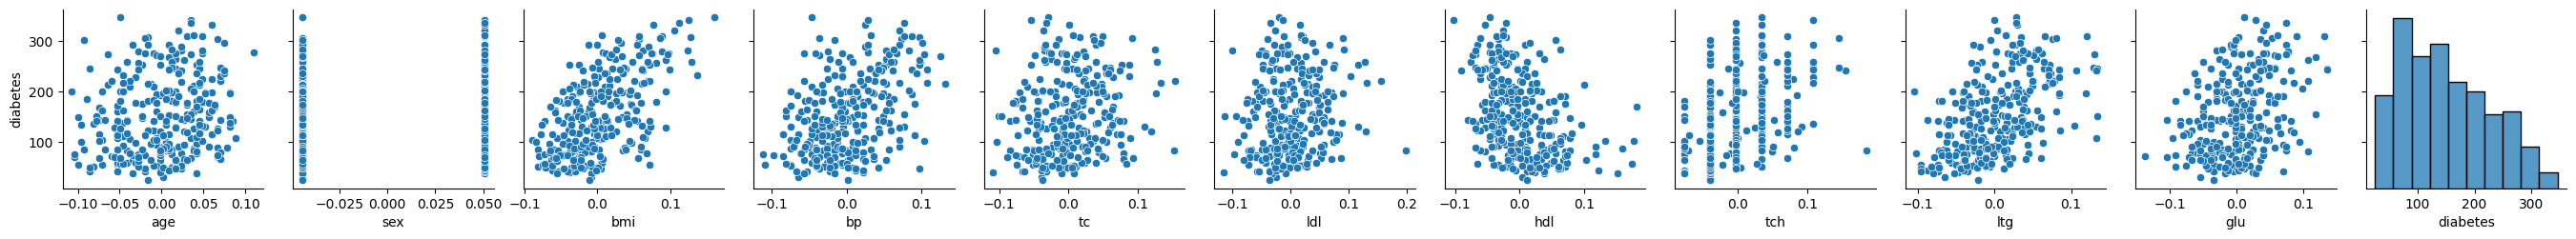

In [63]:
sns.pairplot(data_train, y_vars=['diabetes'])

<AxesSubplot: >

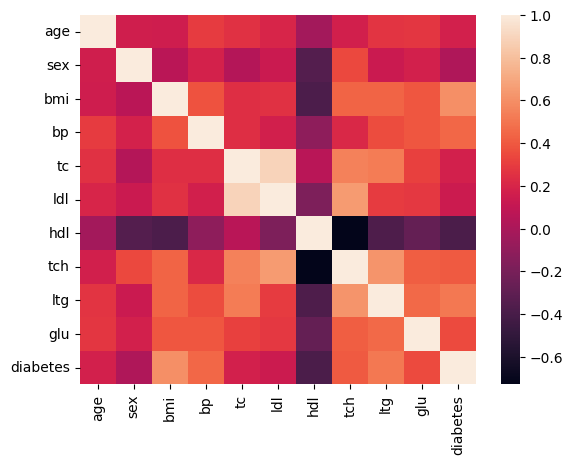

In [64]:
sns.heatmap(data_train.corr())

In [65]:
data_train.corr()['diabetes']

age         0.174440
sex         0.018184
bmi         0.596413
bp          0.448176
tc          0.170479
ldl         0.140885
hdl        -0.388019
tch         0.405185
ltg         0.509415
glu         0.345176
diabetes    1.000000
Name: diabetes, dtype: float64

<AxesSubplot: xlabel='bmi', ylabel='diabetes'>

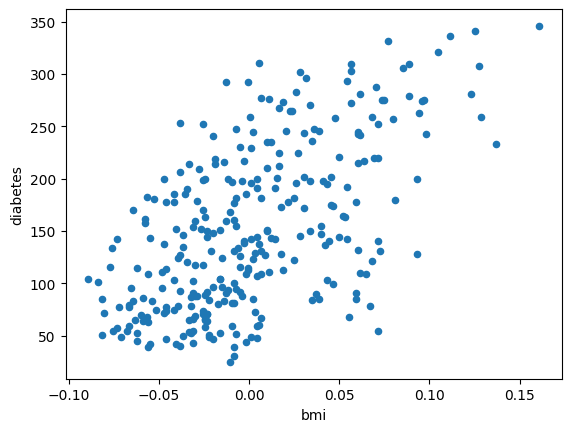

In [11]:
data_train.plot(x='bmi', y='diabetes', kind='scatter')


## Training a simple base model
### Simple linear regression

In [71]:
lr = LinearRegression()

In [73]:
X = data_train[['bmi']]
y = data_train[['diabetes']]

lr.fit(X, y)

LinearRegression()

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


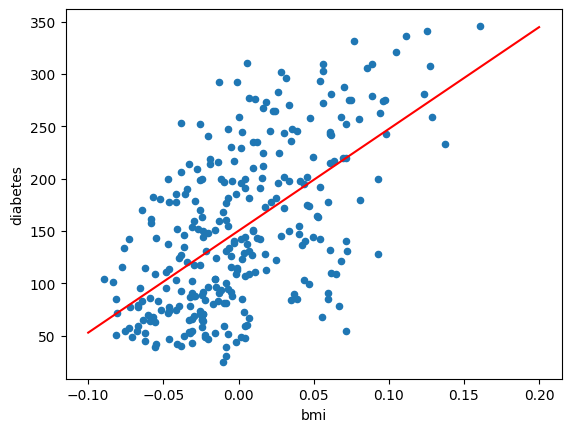

In [74]:
# Fitted line and training data
data_train.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.1, .2, 0.05), lr.predict(np.arange(-0.1, .2, 0.05).reshape(-1, 1)), color='red')

In [76]:
lr.coef_

array([[972.87627375]])

In [77]:
lr.intercept_

array([150.26267496])

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


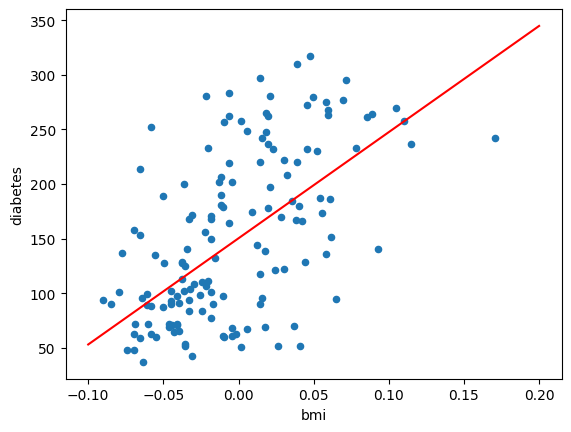

In [75]:
# Fitted line and test data
data_validation.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.1, .2, 0.05), lr.predict(np.arange(-0.1, .2, 0.05).reshape(-1, 1)), color='red')

In [80]:
# RMSE on train data
mean_squared_error(data_train['diabetes'], lr.predict(data_train[['bmi']]), squared=False)

62.25775858793296

The simple linear model is trained on the training set data. We check the error it makes when it predicts the samples in validation set. This is the base error number which we compare other models with.  
If a more complex model can produce a lower error when predicting the validation set samples, it takes the crown as the best model. 

In [81]:
# RMSE on validation data
mean_squared_error(data_validation['diabetes'], lr.predict(data_validation[['bmi']]), squared=False)

62.7221434289942

## Multiple variable linear regression

In [121]:
def multiple_linear_regression(cols):
    lr_multi = LinearRegression()
    # Train the models on given columns
    lr_multi.fit(data_train[cols], data_train['diabetes'])

    train_set_error = mean_squared_error(data_train['diabetes'], lr_multi.predict(data_train[cols]), squared=False)
    validation_set_error = mean_squared_error(data_validation['diabetes'], lr_multi.predict(data_validation[cols]), squared=False)

    print('Columns: ', cols)
    print('Model coefficients: ', lr_multi.coef_)
    print('Model intercept: ', lr_multi.intercept_)
    print('Training set error: ', train_set_error)
    print('Validation set error: ', validation_set_error)

In [122]:
multiple_linear_regression(['bmi'])

Columns:  ['bmi']
Model coefficients:  [972.87627375]
Model intercept:  150.26267496245123
Training set error:  62.25775858793296
Validation set error:  62.7221434289942


Adding *ltg* reduces the validation set error considerably and beats the base model.

In [85]:
multiple_linear_regression(['bmi', 'ltg'])

Columns:  ['bmi', 'ltg']
Model coefficients:  [753.23348918 498.65579995]
Model intercept:  150.16871226577504
Training set error:  58.47515243104837
Validation set error:  53.49416225927702


In [86]:
multiple_linear_regression(['bmi', 'ltg', 'bp', 'tch'])

Columns:  ['bmi', 'ltg', 'bp', 'tch']
Model coefficients:  [646.60411626 383.40918137 332.72180139  70.15198283]
Model intercept:  150.06868303918236
Training set error:  56.65683666734573
Validation set error:  53.908080127701666


In [90]:
multiple_linear_regression(['bmi', 'ltg', 'hdl'])

Columns:  ['bmi', 'ltg', 'hdl']
Model coefficients:  [ 699.99006474  447.22952418 -200.72002194]
Model intercept:  150.38780001662576
Training set error:  57.84565303133397
Validation set error:  53.054354347897586


In [88]:
multiple_linear_regression(['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])

Columns:  ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
Model coefficients:  [  32.14928032 -242.82449076  559.98996952  407.63766881 -718.69857577
  396.63703933   10.432395    171.81955335  627.07993787  -21.62312454]
Model intercept:  150.43401223157832
Training set error:  54.3073804719225
Validation set error:  53.08303210274998


The best model (in terms of validation set error) includes *bmi*, *ltg*, *hdl* model. 

## Higher order linear regression

Let's fit a high order polynomial to the data. While we usually do not go above order 3 or 4, we want to see what happens if we use a much higher order such as 8.

In [91]:
pf = PolynomialFeatures(degree=8, include_bias=False)

In [92]:
X_high = pf.fit_transform(data_train[['bmi']])
X_high

array([[-3.09956318e-02,  9.60729193e-04, -2.97784084e-05, ...,
         8.86753604e-10, -2.74854882e-11,  8.51930074e-13],
       [ 5.41515220e-02,  2.93238734e-03,  1.58793237e-04, ...,
         2.52152922e-08,  1.36544645e-09,  7.39410035e-11],
       [-5.12814206e-03,  2.62978410e-05, -1.34859065e-07, ...,
         1.81869673e-14, -9.32653520e-17,  4.78277975e-19],
       ...,
       [-2.02175111e-02,  4.08747755e-04, -8.26386227e-06, ...,
         6.82914196e-11, -1.38068253e-12,  2.79139645e-14],
       [-2.34509473e-02,  5.49946930e-04, -1.28967765e-05, ...,
         1.66326844e-10, -3.90052205e-12,  9.14709371e-14],
       [ 2.82840322e-02,  7.99986479e-04,  2.26268434e-05, ...,
         5.11974040e-10,  1.44806903e-11,  4.09572310e-13]])

In [93]:
X_high.shape

(296, 8)

In [94]:
pf.powers_

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]], dtype=int64)

In [95]:
lr_high = LinearRegression()

In [96]:
lr_high.fit(X_high, data_train['diabetes'])

LinearRegression()

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


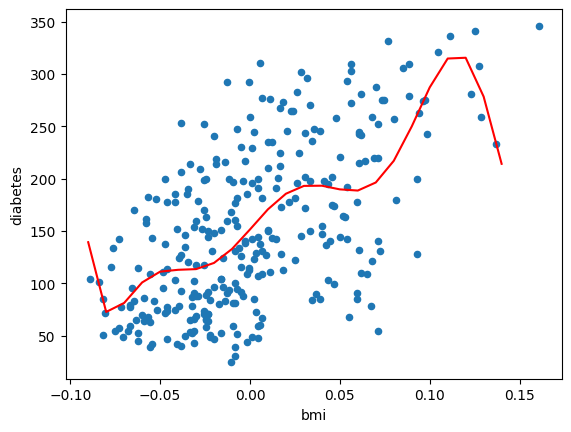

In [97]:
# Fitted line and training data
data_train.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), lr_high.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


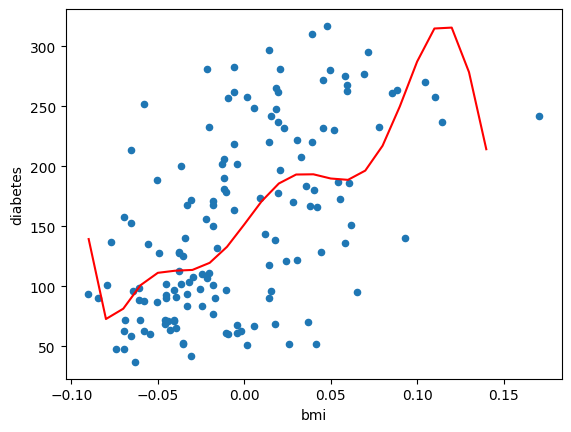

In [98]:
# Fitted line and test data
data_validation.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), lr_high.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

In [99]:
lr_high.coef_

array([ 1.98282957e+03,  3.13751407e+03, -9.04617190e+05, -9.14882560e+05,
        2.05858806e+08, -3.54655058e+08, -1.42018542e+10,  6.18436621e+10])

In [100]:
lr_high.intercept_

151.54901131998457

In [101]:
# RMSE on train data
mean_squared_error(data_train['diabetes'], lr_high.predict(pf.transform(data_train[['bmi']])), squared=False)

60.81491077713127

In [102]:
# RMSE on validation data
mean_squared_error(data_validation['diabetes'], lr_high.predict(pf.transform(data_validation[['bmi']])), squared=False)

87.30712683701323

The error of linear regression using just *bmi* (the base model) was 62.25 on training set and 62.72 on validation set. Notice how a higher order model improved the error on training set buy drastically worsen the error on validation set. The model is *overfitting* the training set. 

## Ridge regression

In [103]:
ri = Ridge(alpha=0.1)

In [104]:
ri.fit(X_high, data_train['diabetes'])

Ridge(alpha=0.1)

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


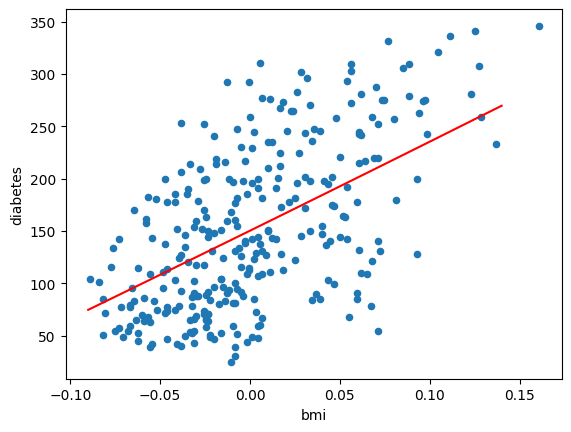

In [105]:
# Fitted line and training data
data_train.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), ri.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


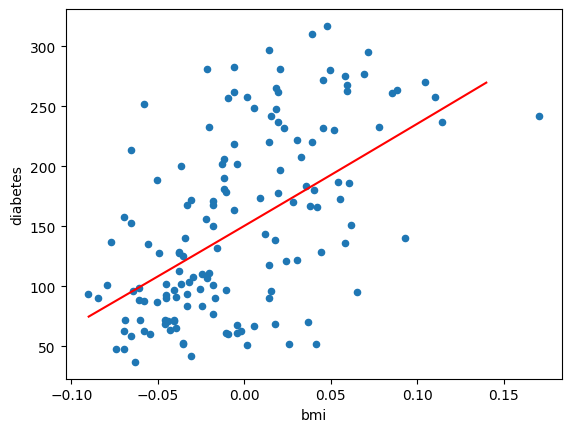

In [106]:
# Fitted line and test data
data_validation.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), ri.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

Notice how the first coefficient is much larger than other ones. 

In [108]:
ri.coef_

array([8.44863589e+02, 5.49935796e+01, 8.10043362e+00, 9.94512793e-01,
       1.32170504e-01, 1.79320535e-02, 2.49076869e-03, 3.59948796e-04])

In [48]:
ri.intercept_

150.3639268571385

In [109]:
# RMSE on train data
mean_squared_error(data_train['diabetes'], ri.predict(pf.transform(data_train[['bmi']])), squared=False)

62.537645021978854

In [110]:
# RMSE on validation data
mean_squared_error(data_validation['diabetes'], ri.predict(pf.transform(data_validation[['bmi']])), squared=False)

62.68113203631742

## Lasso regression

In [111]:
ls = Lasso(alpha=0.1)

In [112]:
ls.fit(X_high, data_train['diabetes'])

Lasso(alpha=0.1)

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


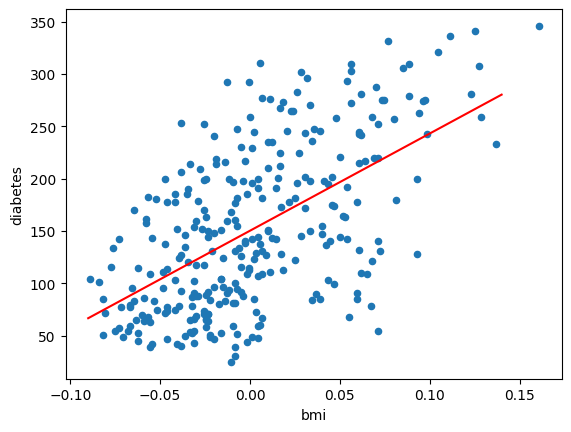

In [113]:
# Fitted line and training data
data_train.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), ls.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


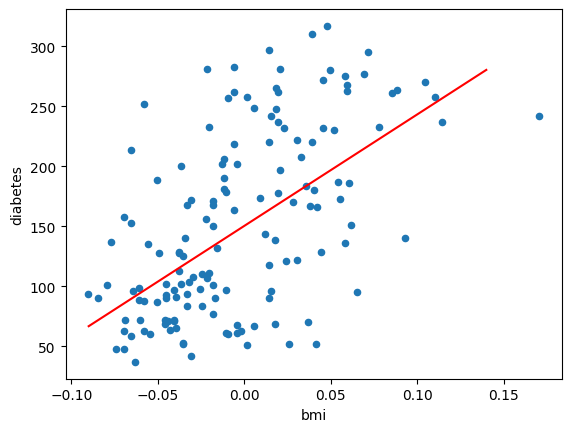

In [114]:
# Fitted line and test data
data_validation.plot(x='bmi', y='diabetes', kind='scatter')
plt.plot(np.arange(-0.09, .15, 0.01), ls.predict(pf.transform(np.arange(-0.09, .15, 0.01).reshape(-1, 1))), color='red')

Lasso regression pushes coeffiecient of higher order terms which do not help to zero.

In [116]:
ls.coef_

array([928.64620872,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [117]:
# RMSE on train data
mean_squared_error(data_train['diabetes'], ls.predict(pf.transform(data_train[['bmi']])), squared=False)

62.293270189453914

In [118]:
# RMSE on validation data
mean_squared_error(data_validation['diabetes'], ls.predict(pf.transform(data_validation[['bmi']])), squared=False)

62.63728298861754

### Multiple polynomial regression

In [139]:
def multiple_lasso_regression(cols, degree=2, alpha=0.1):
    # transform the data
    pf_multi = PolynomialFeatures(degree, include_bias=False)
    X_train = pf_multi.fit_transform(data_train[cols])
    
    # fit the model
    ls = Lasso(alpha=0.1)
    ls.fit(X_train, data_train['diabetes'])

    # evaluate training error
    y_hat_train = ls.predict(X_train)
    train_set_error = mean_squared_error(data_train['diabetes'], y_hat_train, squared=False)

    # evaluate the validation error
    y_hat_validation = ls.predict(pf_multi.transform(data_validation[cols]))
    validation_set_error = mean_squared_error(data_validation['diabetes'], y_hat_validation, squared=False)

    print('Columns: ', cols)
    print('Polynomial degree: ', degree)
    print('Model coefficients: ', ls.coef_)
    print('Model intercept: ', ls.intercept_)
    print('Training set error: ', train_set_error)
    print('Validation set error: ', validation_set_error)



In [125]:
multiple_lasso_regression(['bmi'])

Columns:  ['bmi']
Polynomial degree:  2
Model coefficients:  [928.64620872   0.        ]
Model intercept:  150.34089135230926
Training set error:  62.293270189453914
Validation set error:  62.63728298861754


In [127]:
multiple_lasso_regression(['bmi'], alpha=0.01)

Columns:  ['bmi']
Polynomial degree:  2
Model coefficients:  [928.64620872   0.        ]
Model intercept:  150.34089135230926
Training set error:  62.293270189453914
Validation set error:  62.63728298861754


In [128]:
multiple_lasso_regression(['bmi', 'ltg', 'hdl'])

Columns:  ['bmi', 'ltg', 'hdl']
Polynomial degree:  2
Model coefficients:  [ 676.1560919   423.50516449 -174.39531187    0.            0.
   -0.           -0.            0.            0.        ]
Model intercept:  150.4430373792339
Training set error:  57.909486384315706
Validation set error:  53.29258768937046


In [140]:
multiple_lasso_regression(['bmi', 'ltg', 'hdl'], alpha=0.0001)

Columns:  ['bmi', 'ltg', 'hdl']
Polynomial degree:  2
Model coefficients:  [ 676.1560919   423.50516449 -174.39531187    0.            0.
   -0.           -0.            0.            0.        ]
Model intercept:  150.4430373792339
Training set error:  57.909486384315706
Validation set error:  53.29258768937046


## Conclusion

Based on the validation RMSE, the best model seems to be the linear model with *bmi*, *ltg*, and *hdl* features. If we wanted to use this model in production, we could take that model and evaluate its performance on the test set.
